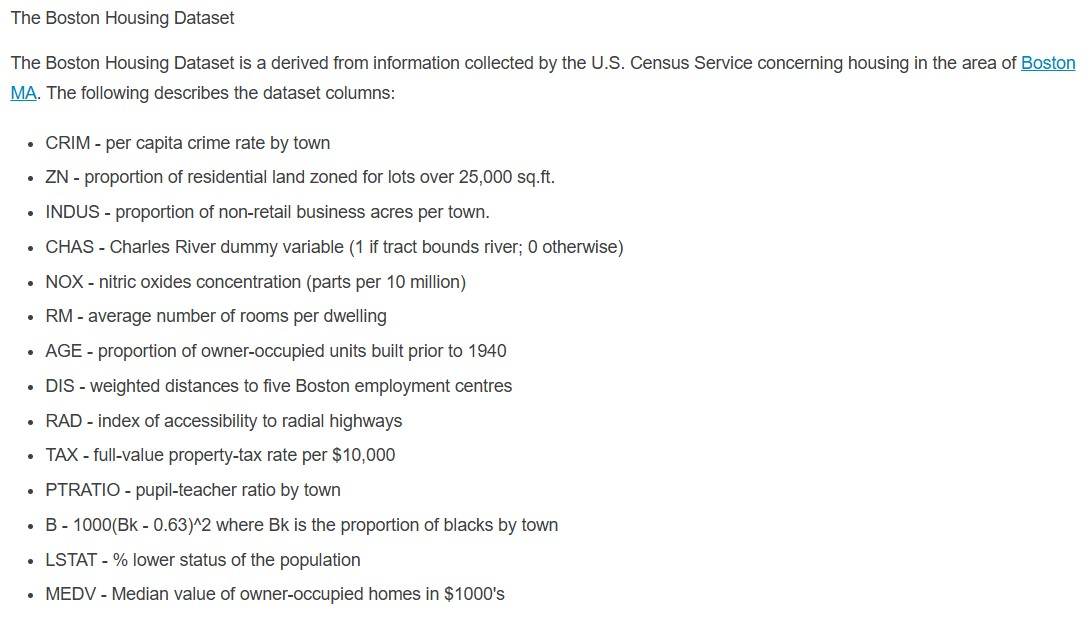

In [99]:
import pandas as pd
import numpy as np

In [100]:
data = pd.read_csv("Boston housing.csv")

In [101]:
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [102]:
# Need to add column names

column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV(1000$)']

data = pd.read_csv("Boston housing.csv",header=None,delimiter=r"\s+",names=column_names)

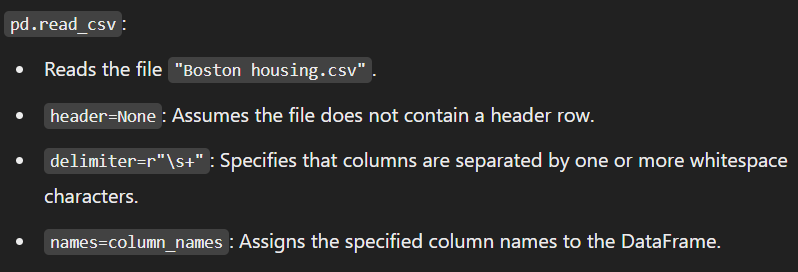

In [103]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV(1000$)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [104]:
x = data.drop('MEDV(1000$)',axis=1)
y = data['MEDV(1000$)']

In [105]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [106]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV(1000$), dtype: float64

In [107]:
correlation = x.corrwith(y)
correlation

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
dtype: float64

In [108]:
threshold = 0.4

rel_corr = correlation[(correlation<-threshold) | (correlation>threshold)]
rel_corr

INDUS     -0.483725
NOX       -0.427321
RM         0.695360
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64

In [109]:

# data_n = data[rel_corr.index].copy()

# data_n['MEDV(1000$)'] = data['MEDV(1000$)']

# data_n.head()

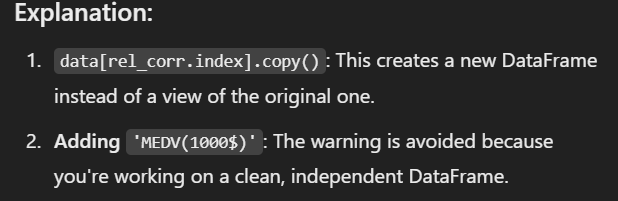

In [110]:
# data_n.dtypes

In [111]:
x_n = data[rel_corr.index]
y_n = data['MEDV(1000$)']

In [112]:
x_n.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33


In [113]:
y_n.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV(1000$), dtype: float64

In [114]:
from sklearn.model_selection import train_test_split

x_train_n,x_test_n,y_train_n,y_test_n = train_test_split(x_n,y_n,test_size=0.2,random_state=42)

# 1) Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression

LR =LinearRegression()
LR.fit(x_train_n,y_train_n)

y_pred_n = LR.predict(x_test_n)

In [116]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_pred_n,y_test_n)
mae = mean_absolute_error(y_pred_n,y_test_n)
r2 = r2_score(y_pred_n,y_test_n)

print(f'Mean Absolute Error: {mae}')
print(f'Mean squared error:{mse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 3.3543379192925564
Mean squared error:27.796815732022285
R2 Score: 0.51172029879694


#### Without considering correlations 
#### Add all the columns

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [118]:
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {r2}')

mean_squared_error: 24.29111947497374
mean_absolute_error: 3.189091965887874
r2_score: 0.633324746901432


### Plot the results as graphs


In [119]:
import matplotlib.pyplot as plt

### i) Actual Vs Predicetd

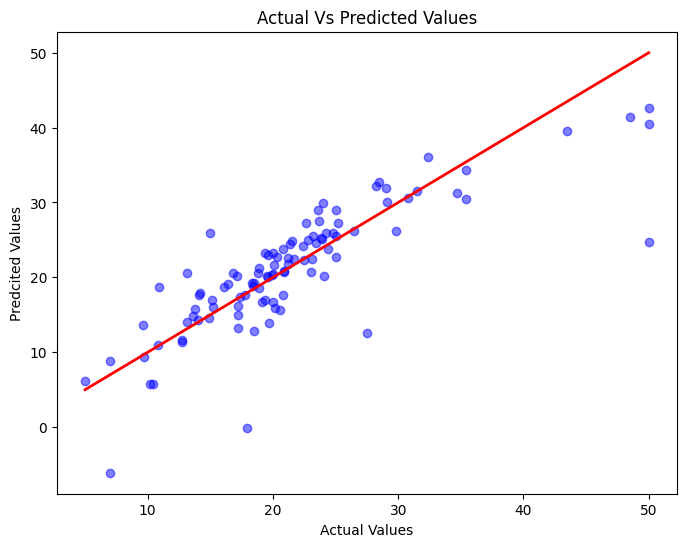

In [120]:
plt.figure(figsize=(8,6))

plt.scatter(y_test,y_pred,color='blue',alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',lw=2)

plt.xlabel('Actual Values')
plt.ylabel('Predcited Values')
plt.title('Actual Vs Predicted Values')
plt.show()

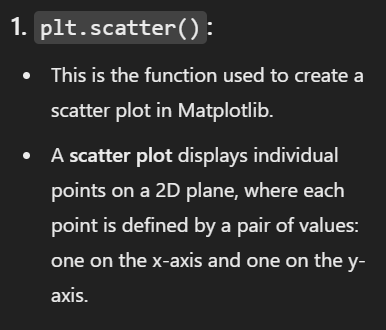 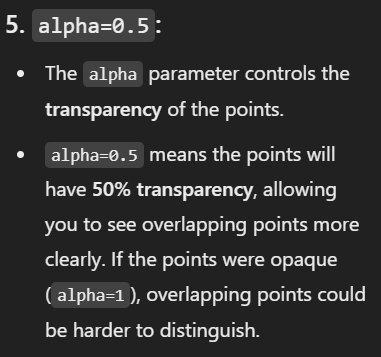

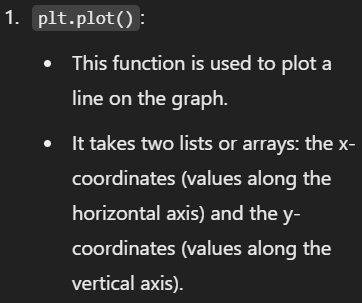 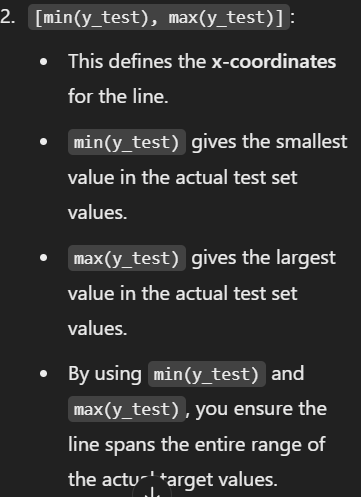 ! 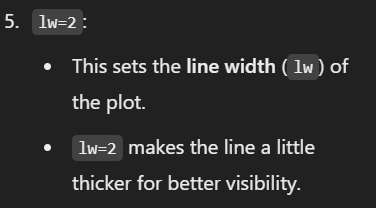 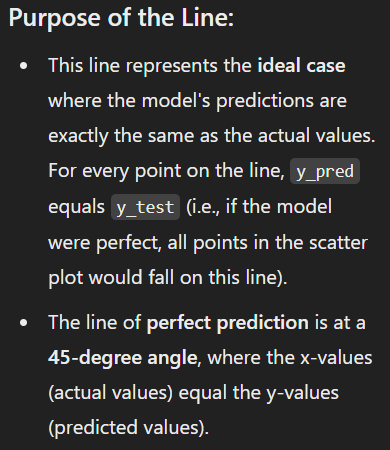

### ii) Residual Plot

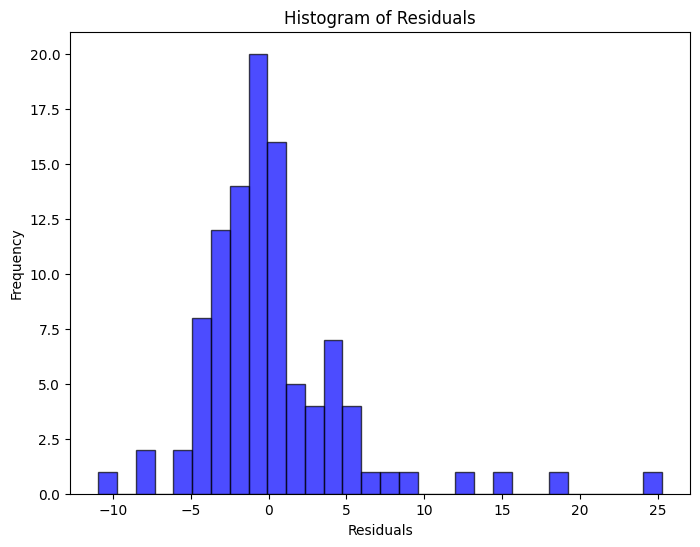

In [121]:
# Histogram of Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))

plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


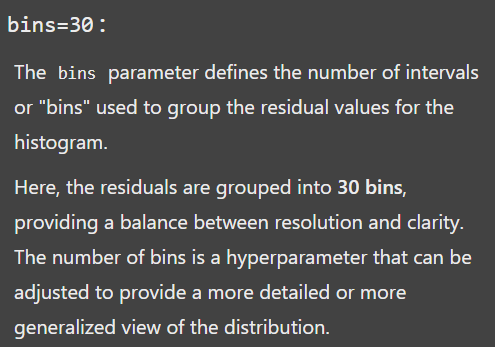

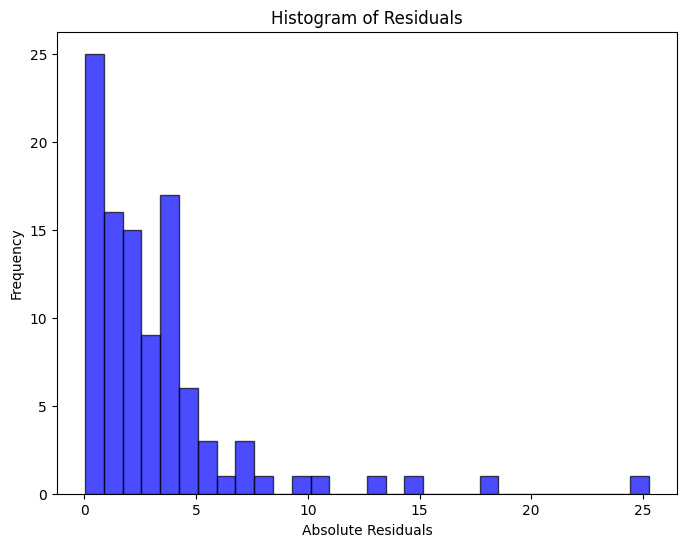

In [122]:
abs_res = np.abs(residuals)

plt.figure(figsize=(8, 6))

plt.hist(abs_res, bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

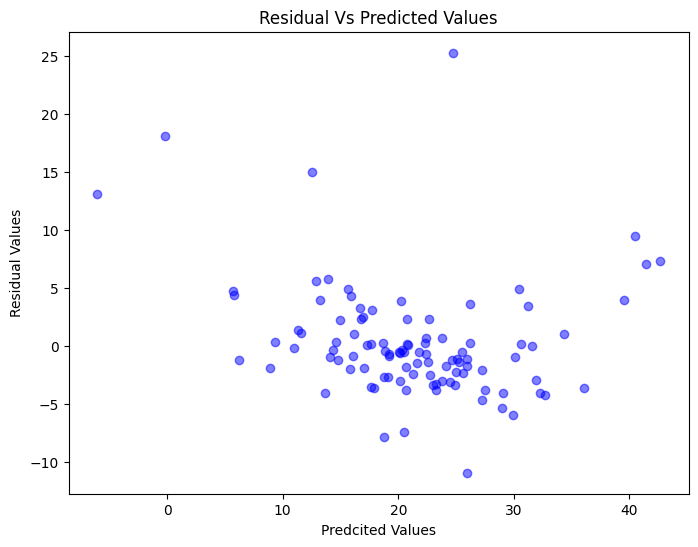

In [123]:
plt.figure(figsize=(8,6))

plt.scatter(y_pred,residuals,color='blue',alpha=0.5)

plt.ylabel('Residual Values')
plt.xlabel('Predcited Values')
plt.title('Residual Vs Predicted Values')
plt.show()

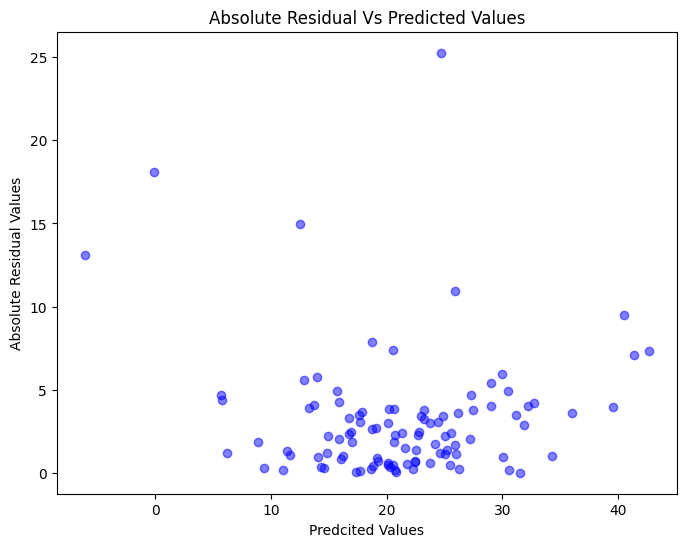

In [124]:
plt.figure(figsize=(8,6))

plt.scatter(y_pred,abs_res,color='blue',alpha=0.5)

plt.ylabel('Absolute Residual Values')
plt.xlabel('Predcited Values')
plt.title('Absolute Residual Vs Predicted Values')
plt.show()

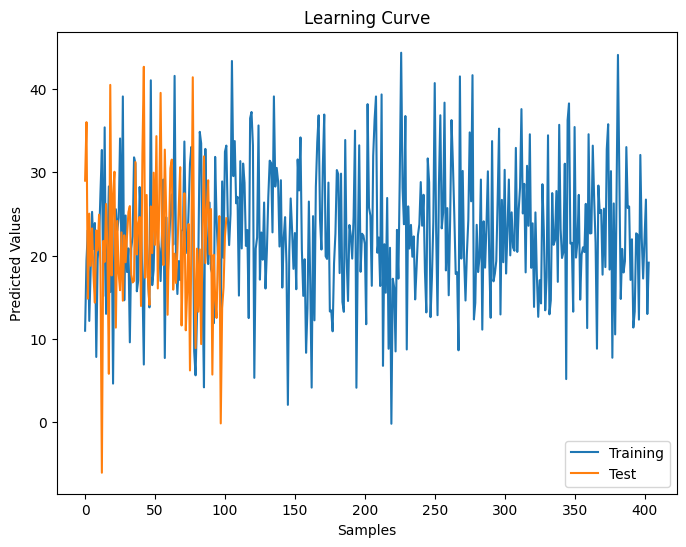

In [125]:
# Learning Curve
plt.figure(figsize=(8, 6))

plt.plot(range(len(y_train)), LR.predict(x_train), label="Training")
plt.plot(range(len(y_test)), LR.predict(x_test), label="Test")

plt.xlabel('Samples')
plt.ylabel('Predicted Values')
plt.title('Learning Curve')
plt.legend()

plt.show()


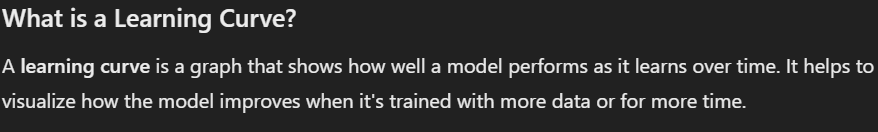

# 2) Polynomial Regression

In [126]:
from sklearn.preprocessing import PolynomialFeatures , StandardScaler

### i) Degree = 2

In [127]:
poly = PolynomialFeatures(degree=2)

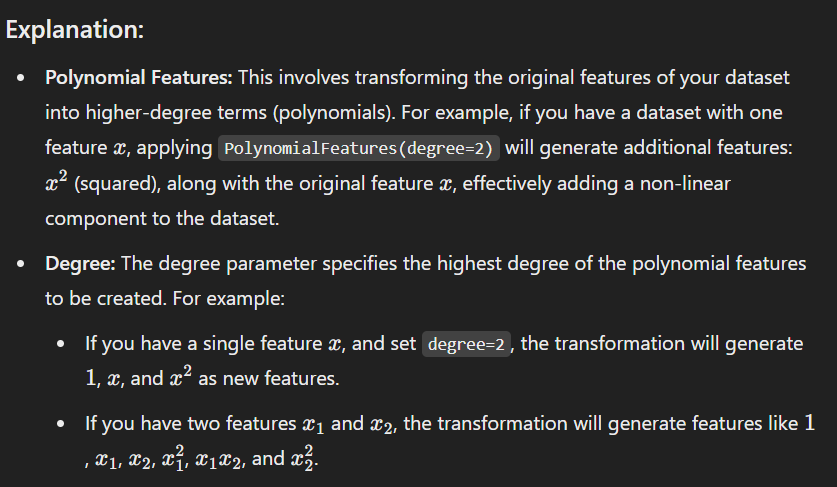

In [128]:
# Polynomial Feature Transformation

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

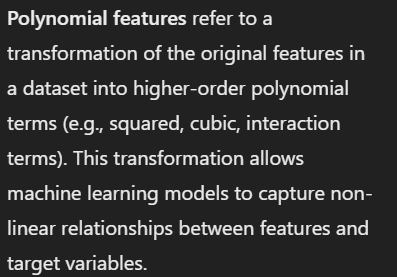

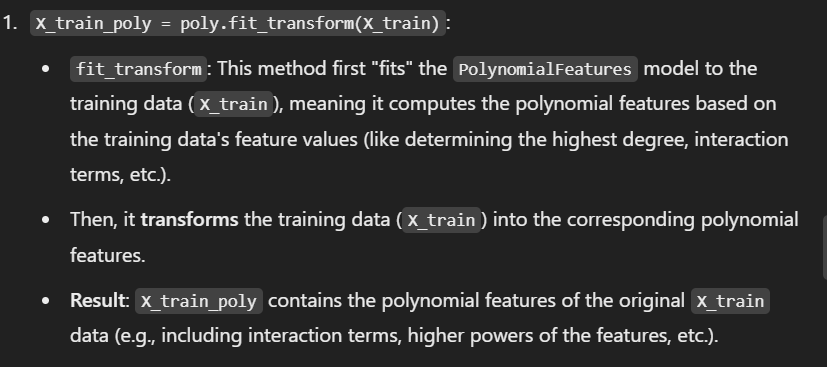

In [129]:
# Standardize the features
scaler = StandardScaler()
x_train_poly = scaler.fit_transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

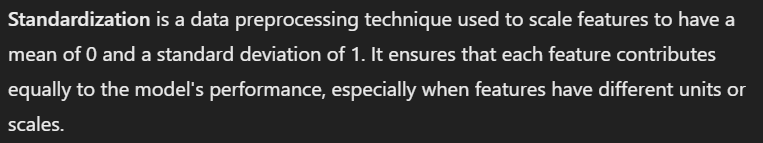 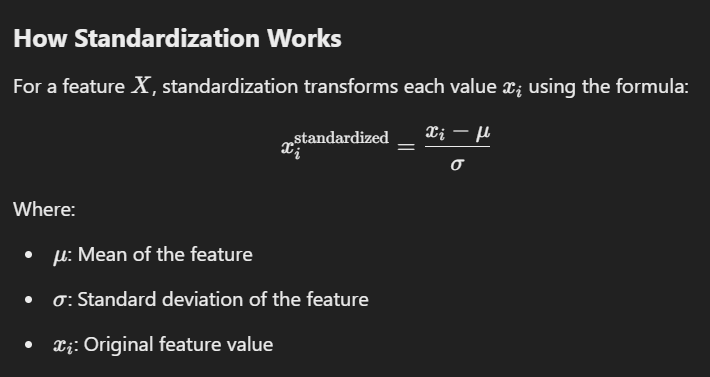 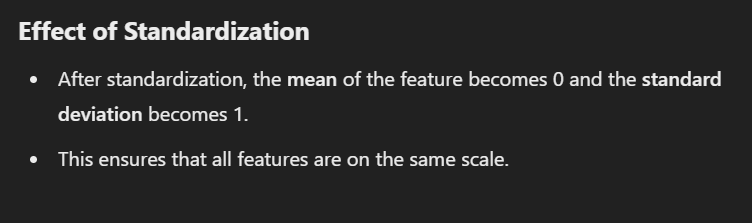

#### Train the polynomial regression

In [130]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_poly,y_train)


# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [ 2.09595016e-11 -6.42920530e+01  1.52112064e+01 -3.25121792e+01
  9.49135961e+00  3.36010216e+01  1.26669624e+01  1.83829850e+01
 -8.64724047e+00  2.26049364e+01  3.78272080e-01  1.70377286e+01
  1.27082025e+01 -1.37765253e+00  2.25998895e-01  1.90418618e-01
  9.02348090e+01  2.29774549e+00 -1.21412085e+01  1.01723957e+01
 -1.82084846e+00 -1.06508771e+00  6.70989855e+01 -2.11420775e+02
  1.17000453e+02 -1.17607874e+00  6.19035801e+00 -7.82511615e-01
 -3.97300370e-01 -2.28808076e-01 -1.31942510e+01 -5.51619520e-01
  9.95876878e-01 -3.67644887e+00 -1.53781596e+00  6.27397511e+00
 -1.20885912e+00  7.31599298e-01 -1.58773362e+00  9.18827002e+00
 -1.01191055e-01 -1.09750638e+00  1.38474816e+01  3.18030523e+00
  2.14955634e+00 -5.73961017e+00  9.79861050e-01 -2.24573690e+00
  8.05707681e+00 -3.04303113e+00  9.49135961e+00 -5.98888720e+00
 -9.06158985e+00 -7.29966041e-01 -7.42346339e-01  4.83005235e-01
 -8.87256356e-01 -3.79100204e+00  1.09762617e+00 -8.85151006e-01
 -1.4053106

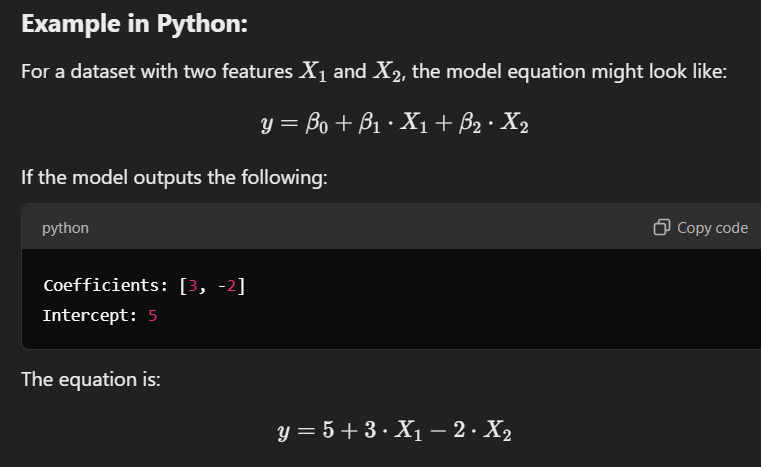

#### Evaluate the Model

In [131]:
y_pred = model.predict(x_test_poly)

mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2_Score: {r2}')

Mean Squared Error: 14.257338168909754
Mean Absolute Error: 2.574835626416232
R2_Score: 0.7920298545099042


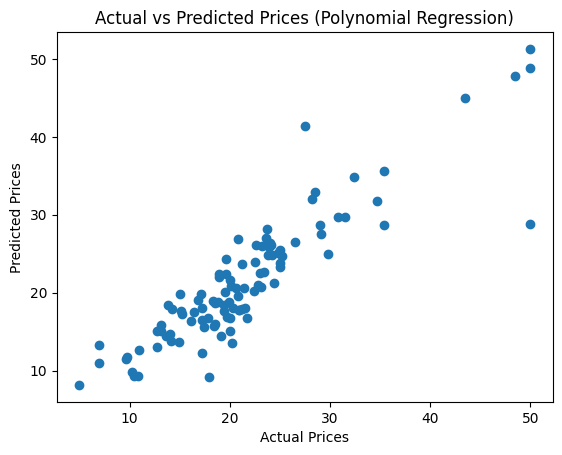

In [132]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Polynomial Regression)')
plt.show()

### ii) Degree = 3

mse : 16476.011012737505
mae : 63.76466397699672
r2_score : 0.005123879678621268


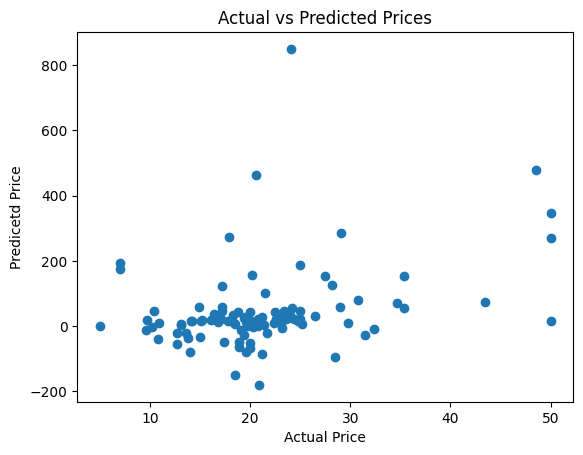

In [133]:
poly = PolynomialFeatures(degree=3)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

scaler = StandardScaler()

x_train_poly = scaler.fit_transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

LR = LinearRegression()
LR.fit(x_train_poly,y_train)

y_pred = LR.predict(x_test_poly)

mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'r2_score : {r2}')


plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicetd Price')
plt.title('Actual vs Predicted Prices')
plt.show()

### So, degree = 2 >> degree = 3

# 3) Decision Trees

In [134]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(x_train,y_train)

y_pred = tree_model.predict(x_test)

mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 23.100882352941177
mae : 2.812745098039216
r2 : 0.7012691478300437


### Visualize the feature importance
#### Decision trees provide feature importance, which shows how much each feature contributes to the model's predictions.

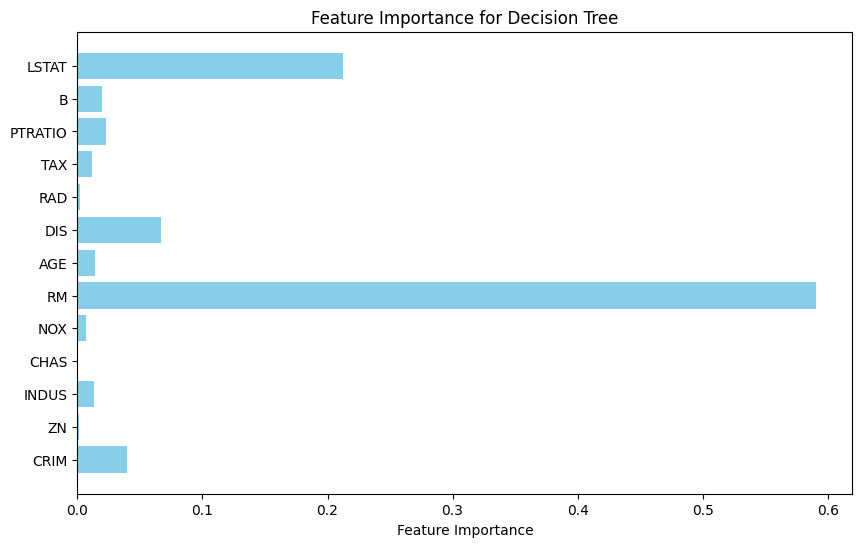

In [135]:
features = x.columns
importance = tree_model.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(features,importance,color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()

### Tune the Model

mse : 8.928833378158663
mae : 2.3767136327277707
r2 : 0.8672917923717085


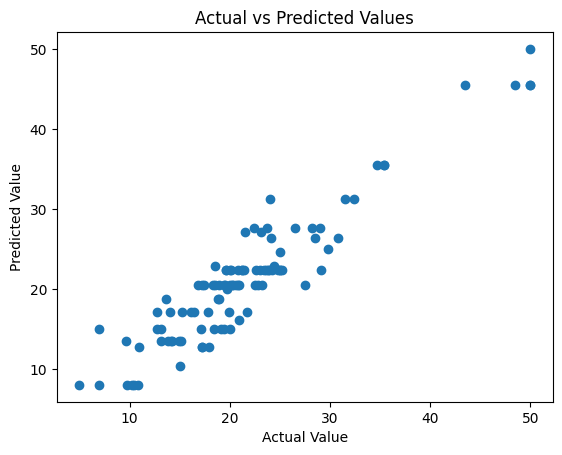

In [136]:
tune_tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tune_tree_model.fit(x_train,y_train)
y_pred = tune_tree_model.predict(x_test)

mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.show()


For random state 42 always 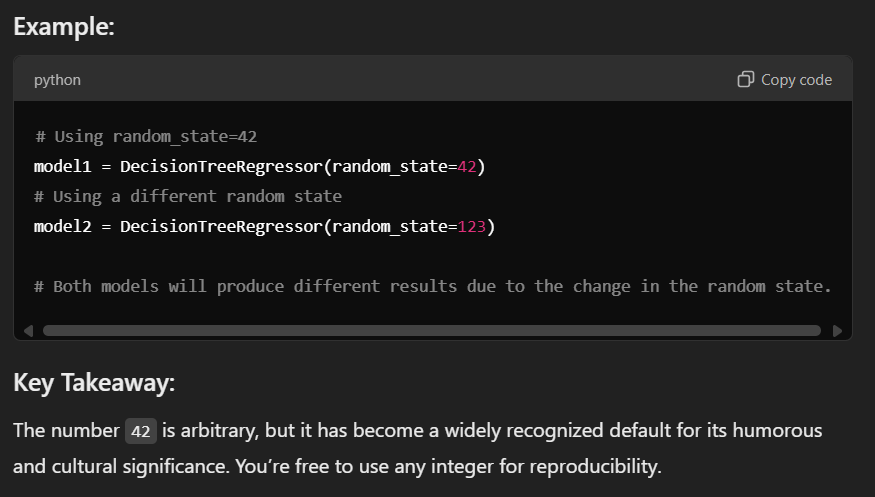

How the Decision tree will work 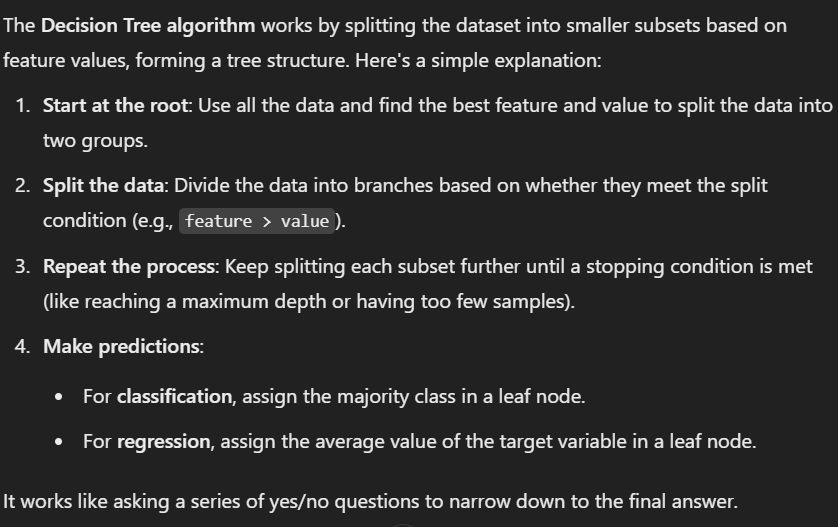

depth of tree 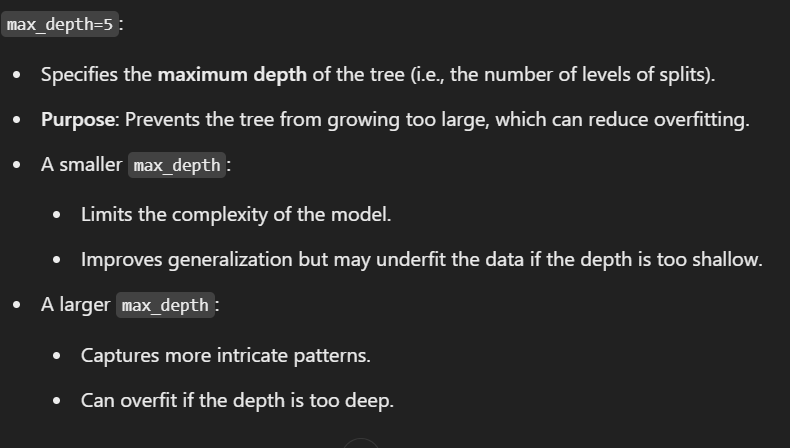

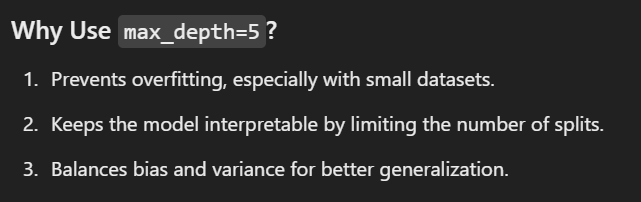

# 4) Random Forests

In [137]:
from sklearn.ensemble import RandomForestRegressor

# RF = RandomForestRegressor()
RF = RandomForestRegressor(n_estimators=200)

RF.fit(x_train,y_train)

y_pred = RF.predict(x_test)

mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(f'mse : {mse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 9.224008002450988
mae : 2.120200980392156
r2 : 0.846496483597436


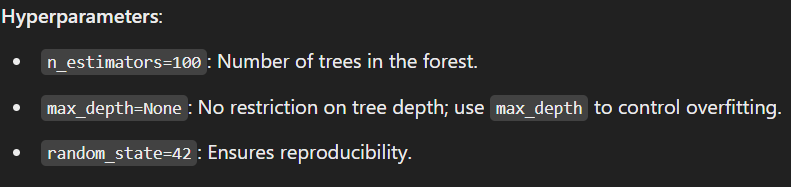

# 5) Support Vector Machines (SVM)

In [138]:
from sklearn.svm import SVR

sv = SVR(kernel='rbf',C=100,epsilon=0.1)

sv.fit(x_train,y_train)
y_predict = sv.predict(x_test)

print(f'mse : {mean_squared_error(y_pred,y_test)}')
print(f'mae : {mean_absolute_error(y_pred,y_test)}')
print(f'r2 : {r2_score(y_pred,y_test)}')

mse : 9.224008002450988
mae : 2.120200980392156
r2 : 0.846496483597436


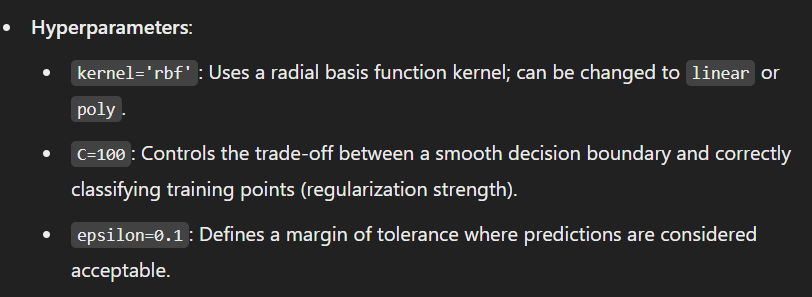

## Do Cross Validation
### Cross-validation is a statistical method used in machine learning to evaluate the performance of a model by splitting the dataset into multiple subsets for training and testing. It helps ensure the model generalizes well to unseen data, reducing the risk of overfitting or underfitting.

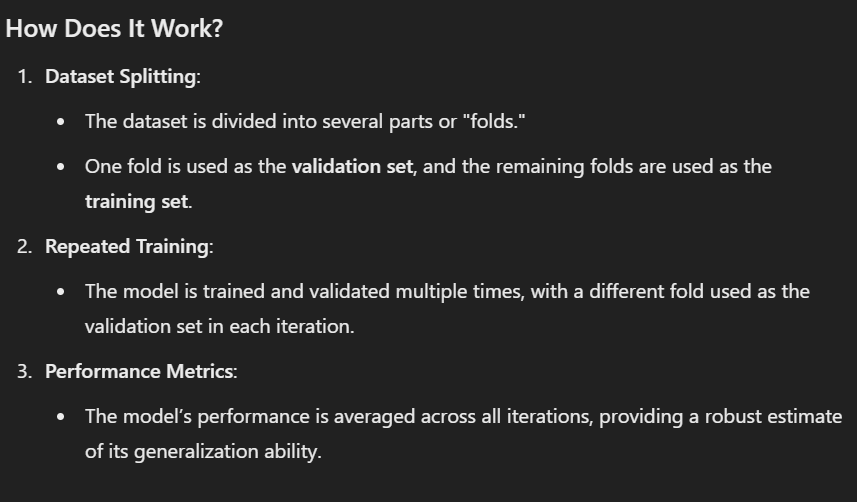

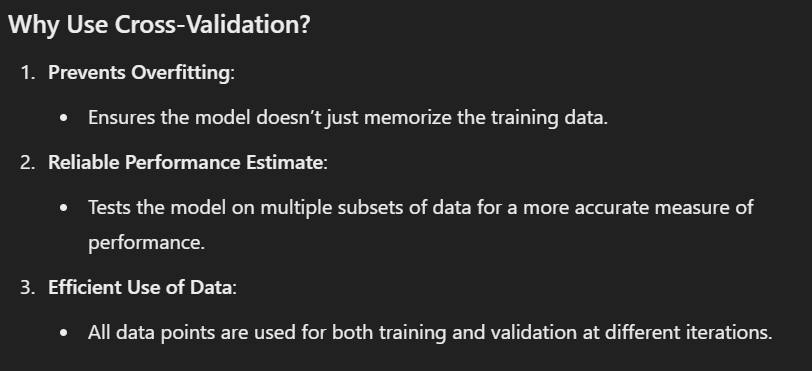

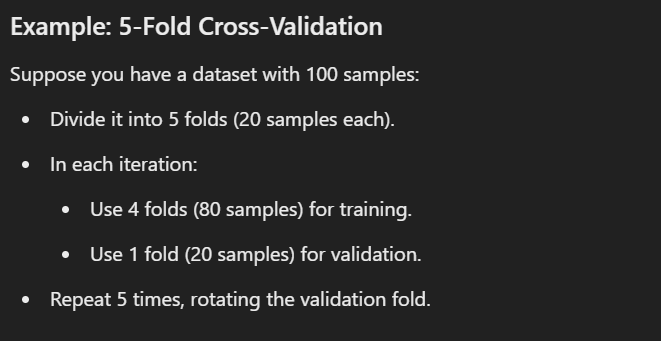

## Doing K-Fold Cross validation for Linear Regression Model

In [139]:
from sklearn.model_selection import cross_val_score, KFold
scaler = StandardScaler()
LR = LinearRegression()
x_scaled = scaler.fit_transform(x)

### Perform K-Fold Cross Validation

In [140]:
# Define 5 fold cross validation
kf = KFold(n_splits=5,shuffle=True,random_state=42)

# Perform cross-validation and compute negative mean squared error
scores = cross_val_score(LR, x_scaled,y,cv=kf,scoring='neg_mean_squared_error')

# Convert negative mse to positive
mse_scores = -scores

# Print the results
print("Mean Squared Errors for ecah fold:",mse_scores)
print("Average MSE:",mse_scores.mean())
print("Standatd Deviation of MSE:",mse_scores.std())

Mean Squared Errors for ecah fold: [24.29111947 20.86790094 26.39596869 23.40122508 22.48676421]
Average MSE: 23.488595677968632
Standatd Deviation of MSE: 1.8426178715726418


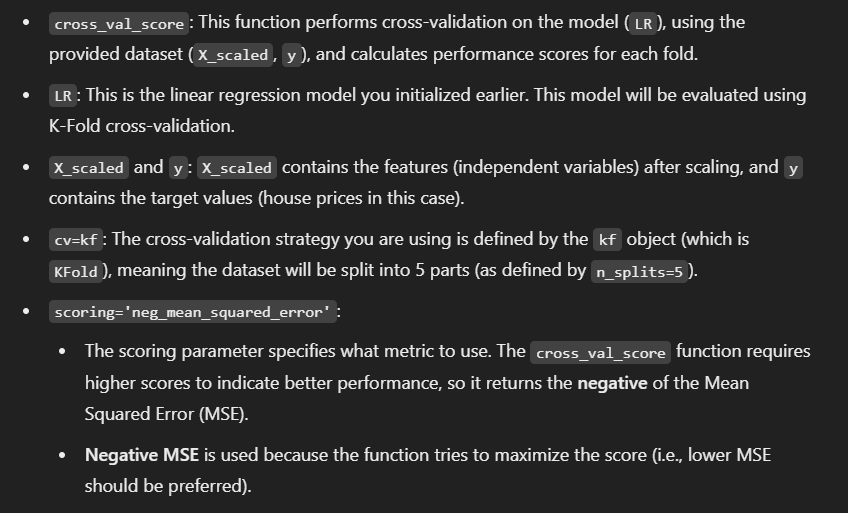

### Visualize Cross Validation Results

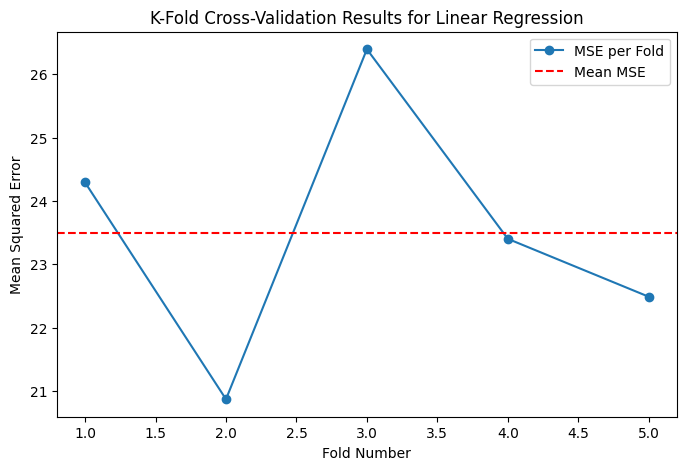

In [141]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(mse_scores)+1),mse_scores,marker='o',label='MSE per Fold')
plt.axhline(mse_scores.mean(),color='r',linestyle='--',label='Mean MSE')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.title('K-Fold Cross-Validation Results for Linear Regression')
plt.legend()
plt.show()

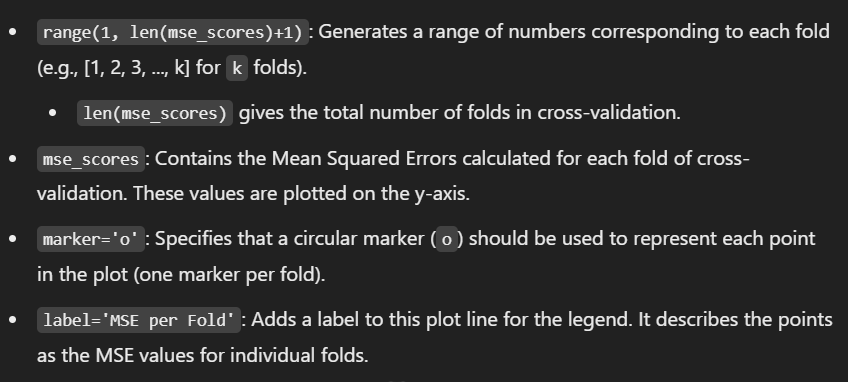 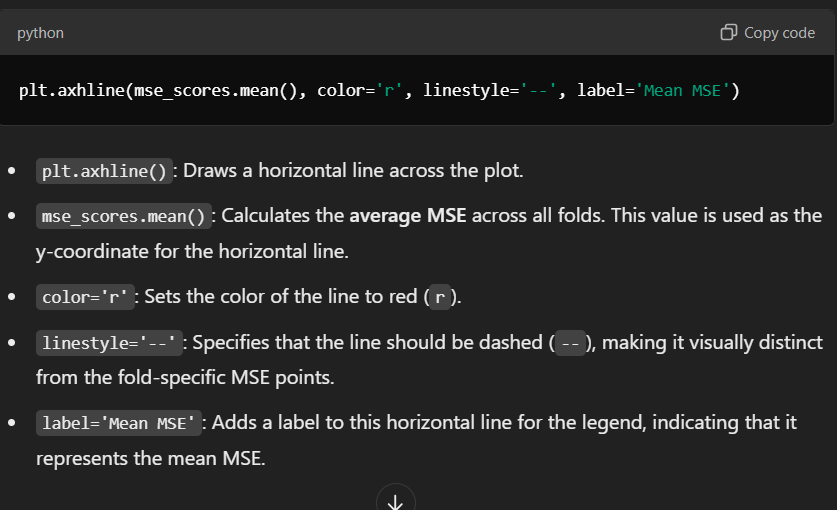

## Doing regularization

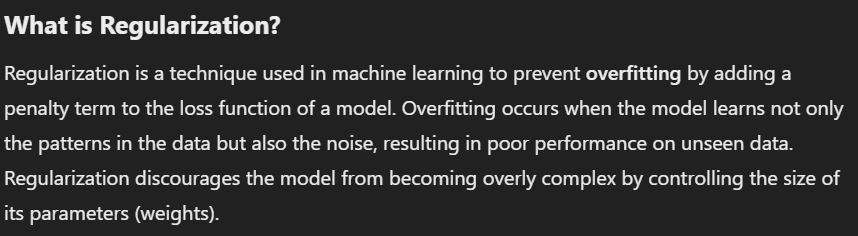 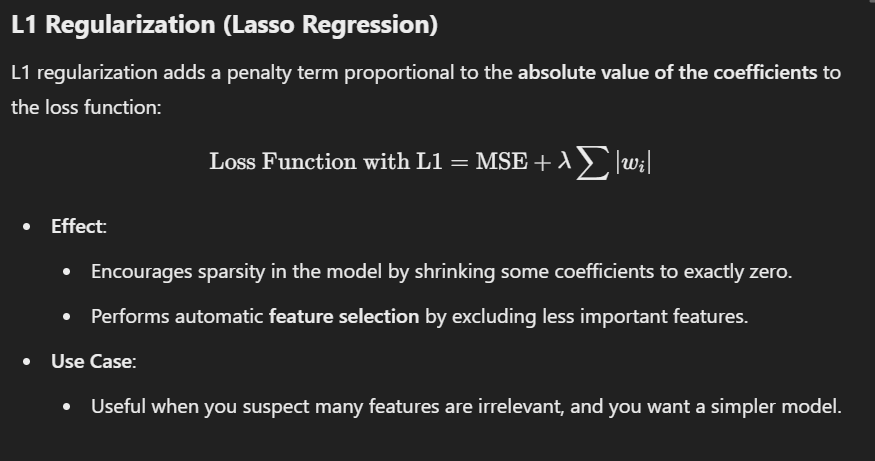 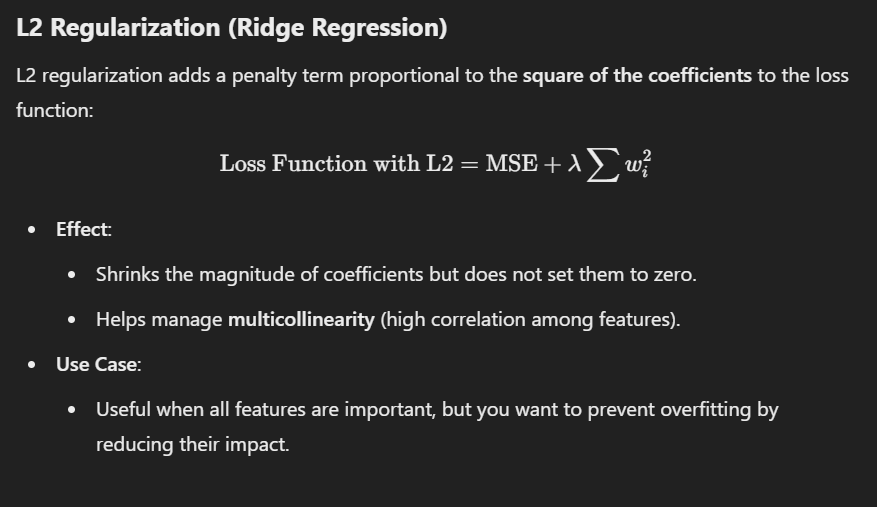 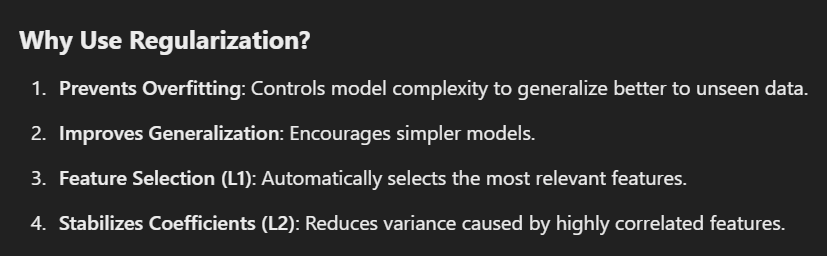

Lasso (L1) regularization can help with feature selection by setting some feature coefficients to zero. 

Lasso (L1) regularization can help with feature selection by setting some feature coefficients to zero. 

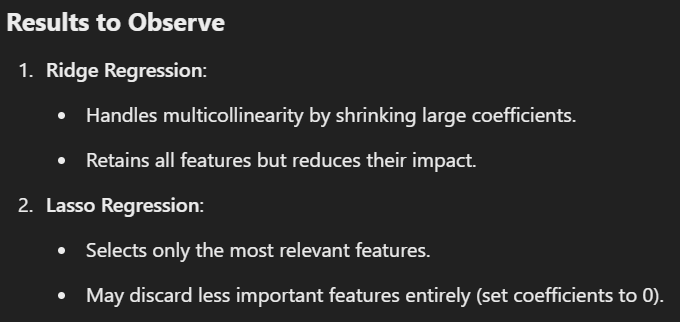

In [142]:
scaler = StandardScaler()

x_trained_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### i)   Ridge Regression

In [143]:
from sklearn.linear_model import Ridge

ridge =Ridge(alpha=1.0)
ridge.fit(x_trained_scaled,y_train)

y_pred_ridge = ridge.predict(x_test_scaled)

ridge_mse = mean_squared_error(y_pred_ridge,y_test)
ridge_mae = mean_absolute_error(y_pred_ridge,y_test)
ridge_r2 = r2_score(y_pred_ridge,y_test)

print(f'mse : {ridge_mse}')
print(f'mae : {ridge_mae}')
print(f'r2 : {ridge_r2}')

mse : 24.312903830491624
mae : 3.185723807244598
r2 : 0.6308634408100438


### ii) Lasso Regression

In [144]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x_trained_scaled,y_train)

y_pred_lasso = lasso.predict(x_test_scaled)

lasso_mse = mean_squared_error(y_pred_lasso,y_test)
lasso_mae = mean_absolute_error(y_pred_lasso,y_test)
lasso_r2 = r2_score(y_pred_lasso,y_test)

print(f'mse : {lasso_mse}')
print(f'mae : {lasso_mae}')
print(f'r2 : {lasso_r2}')

mse : 25.656739367167685
mae : 3.2418034658794648
r2 : 0.5688331019972122
